# Tokens By Its Liquidity

In [1]:
import os
import sys
import dotenv
import plotly.express as px
import pandas as pd

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from quantnote_query_api.query_api_client import QuantNoteQueryApi

## Create Query Api Client

In [3]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = QuantNoteQueryApi(auth_token=AUTH_TOKEN, api_version="v1")
client

In [4]:
query = """SELECT token_id,
       *symbol('token_id', 'eth', 'tokens') as symbol,
       sum(cast(liquidity_usd as decimal(38, 10))) as liquidity
FROM series.chain_eth.token_liquidities
WHERE against_id in (token('0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2', 'eth'),
                     token('0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48', 'eth'),
                     token('0xdAC17F958D2ee523a2206206994597C13D831ec7', 'eth'))
group by token_id
order by liquidity desc
limit 10;"""

response = client.get_data_response(query)
response['liquidity'] = pd.to_numeric(response['liquidity'])
response

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,liquidity,symbol,token_id
0,1.074636e+08,WETH,2
1,8.163262e+07,USDC,3
2,5.748234e+07,WISE,383
3,4.175398e+07,USDT,8
4,3.406201e+07,DAI,192
5,3.268747e+07,ILV,28
6,2.478414e+07,HUSD,2323
7,1.762915e+07,WBTC,260
8,1.489044e+07,FNK,13715
9,1.226991e+07,UNI,462


## Create bar chart

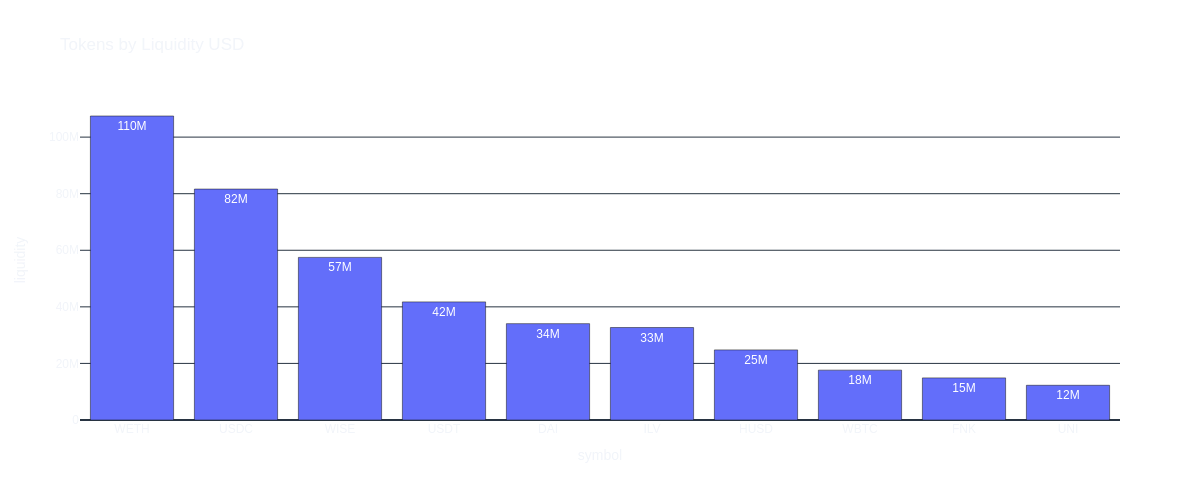

In [5]:
fig = px.bar(response, y='liquidity', x='symbol', text_auto='.2s',
            title="Tokens by Liquidity USD")
fig.update_layout(
    width=1200,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show("png")

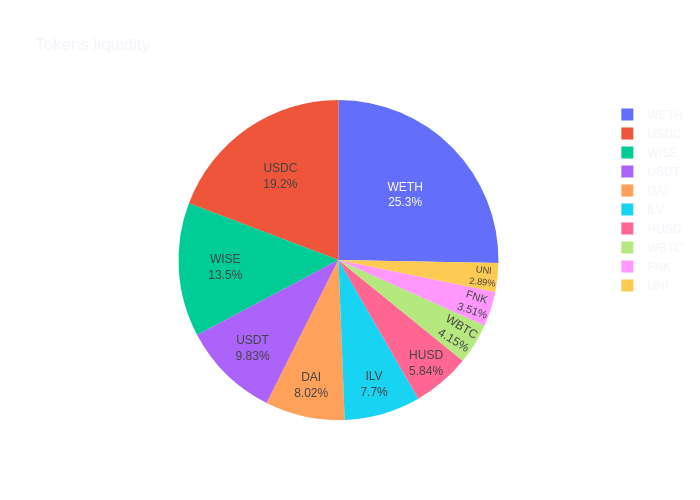

In [6]:
fig = px.pie(response, values='liquidity', names='symbol',
             title='Tokens liquidity')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show("png")